In [115]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.datasets import load_iris
from sklearn.metrics import pairwise_distances_argmin

In [116]:
# Iris data
iris = load_iris()  # load data
X = iris.data[:, 2:]  # data
y_true = iris.target  # target
class_names = iris.target_names  # Iris class names

print(f'\nclass names: \n{class_names}')
print(f'\nfeature names: \n{iris.feature_names}')


class names: 
['setosa' 'versicolor' 'virginica']

feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [117]:
# configs
true_clusters = iris.target_names.shape[0]  # true clusters
n_clusters = 3  # number of clusters we want to classify

output_dir = 'kmeans_iris_iter'  # output directory
os.makedirs(output_dir, exist_ok=True)

In [118]:
# true centers
true_centers = np.array([X[y_true == i].mean(axis=0) for i in range(true_clusters)])

print(true_centers)

[[1.462 0.246]
 [4.26  1.326]
 [5.552 2.026]]


In [119]:
# colors
cmap = plt.get_cmap('tab10')
colors = [cmap(i) for i in range(max(true_clusters, n_clusters))]

# markers
markers = ['o', 's', 'D']

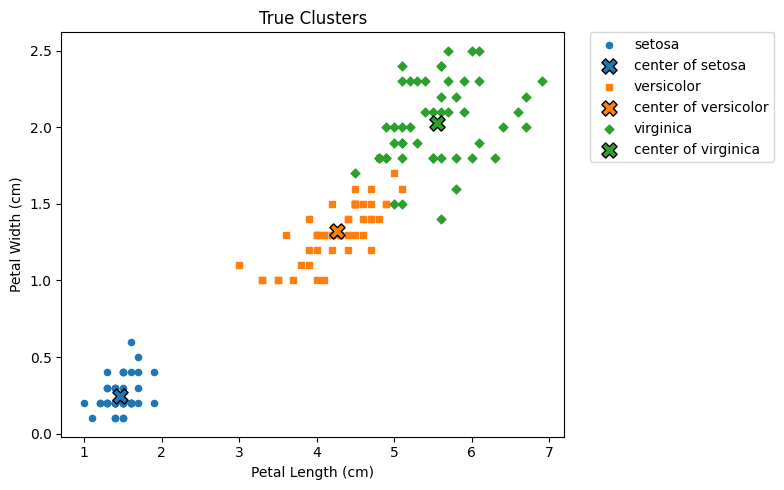

In [120]:
# plot of true values
plt.figure(figsize=(8, 5))
for i in range(true_clusters):
    # true values
    plt.scatter(X[y_true == i, 0], X[y_true == i, 1], color=colors[i], marker=markers[i], s=20, label=f'{class_names[i]}')
    # true centers
    plt.scatter(true_centers[i, 0], true_centers[i, 1], color=colors[i], marker='X', edgecolor='black', s=120, label=f'center of {class_names[i]}')

plt.title(f'True Clusters')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0), borderaxespad=0)
plt.tight_layout()
plt.savefig(f'{output_dir}/true.png', bbox_inches='tight')
plt.show()
plt.close()

In [121]:
# initialize k-means center points
np.random.seed(123)  # set random seed
init_idx = np.random.choice(len(X), size=n_clusters, replace=False)
centers = X[init_idx]

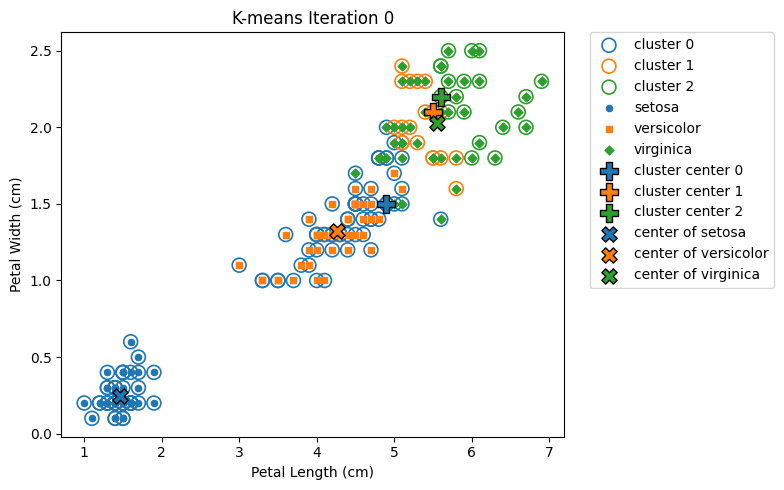

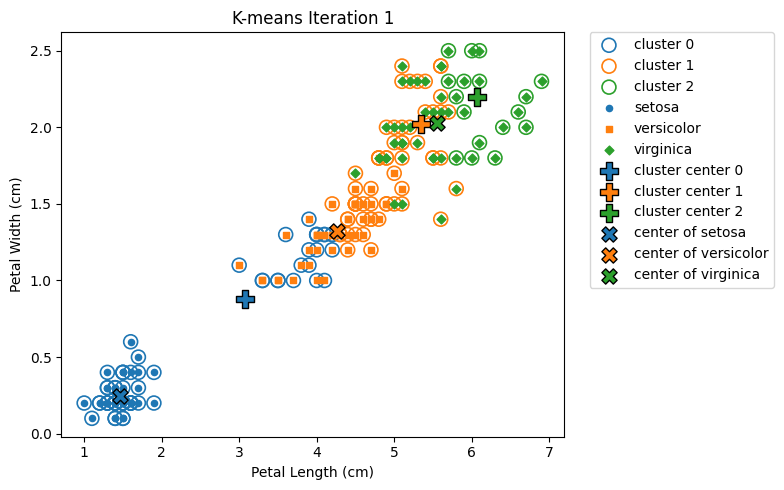

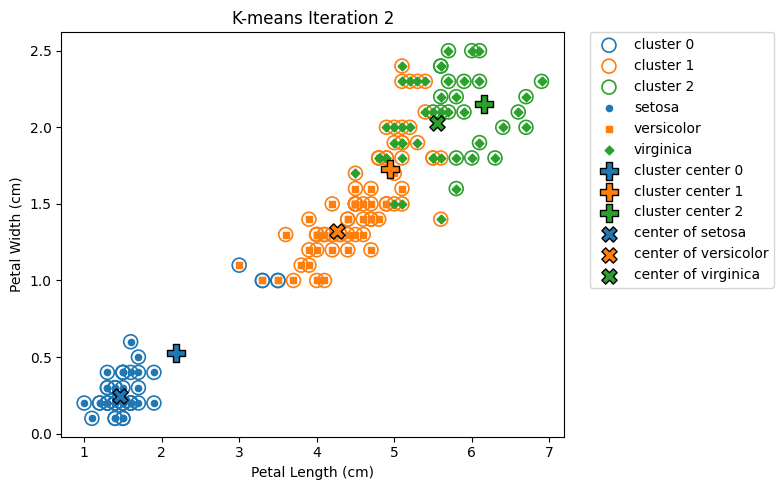

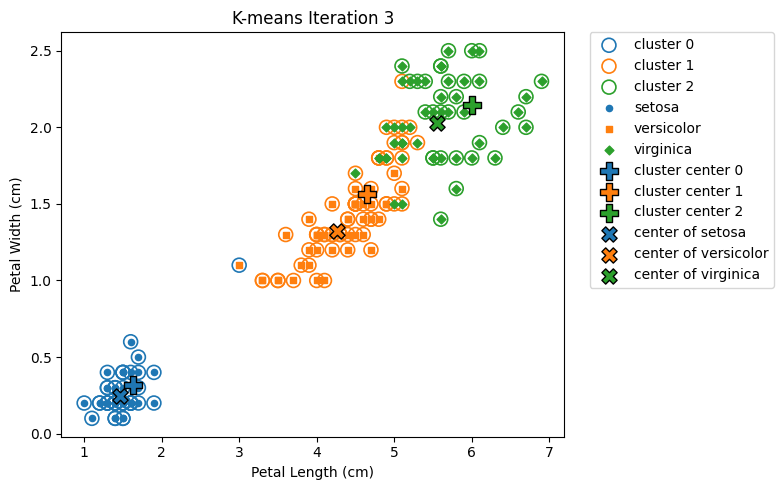

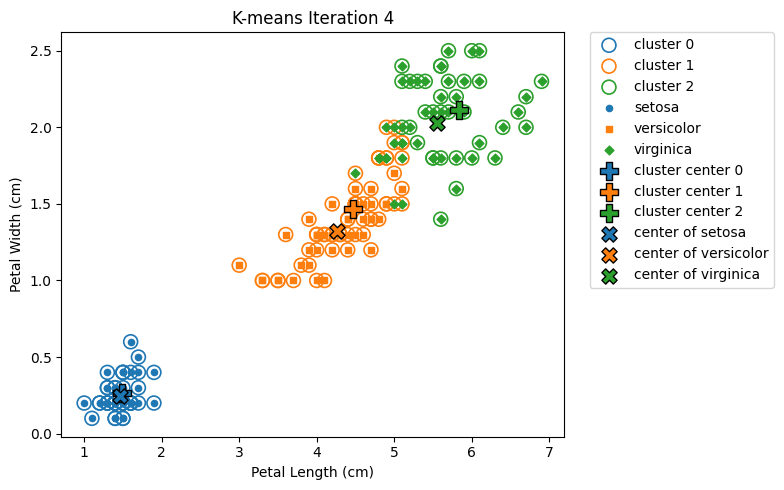

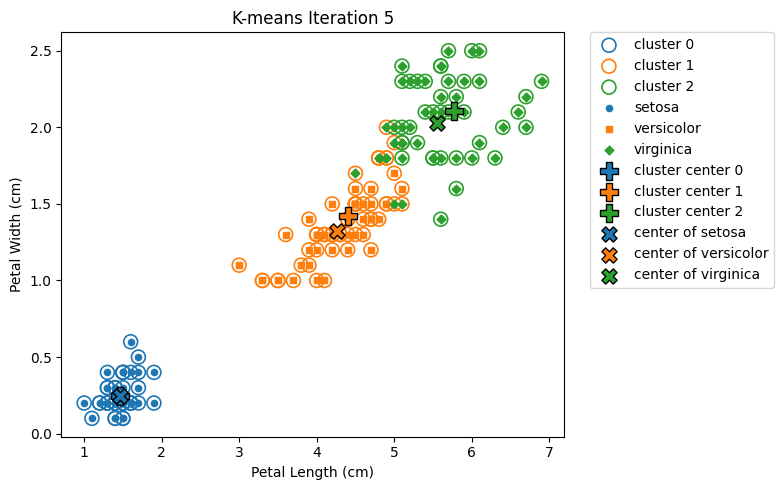

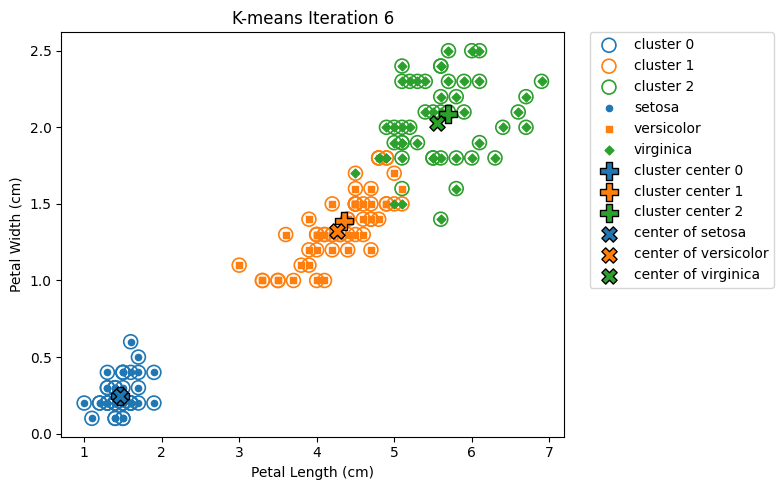

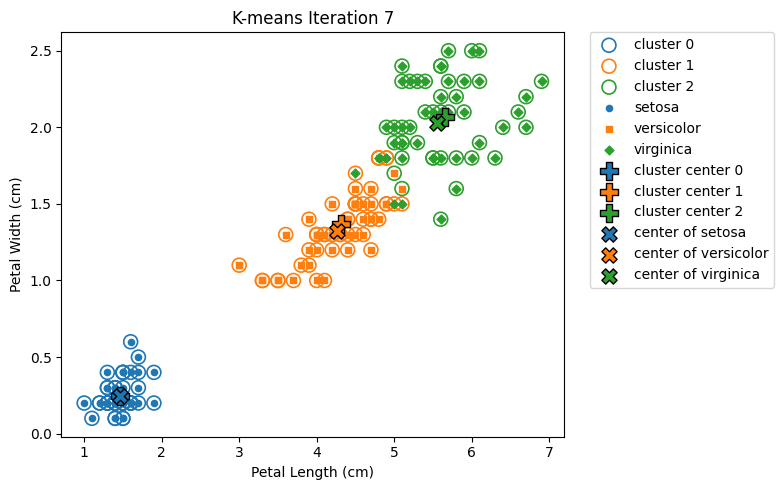

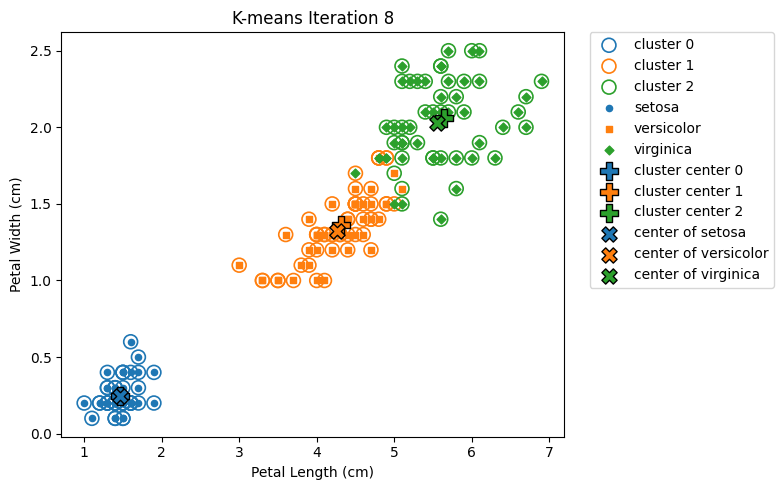

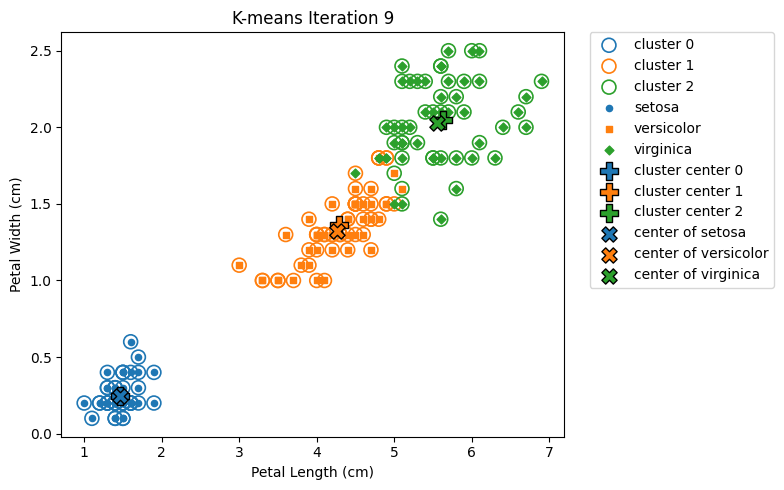

In [122]:
# k-means
iteration = 0
while True:
    # assign each point to the nearest center
    labels = pairwise_distances_argmin(X, centers)

    plt.figure(figsize=(8, 5))
    # cluster values
    for i in range(n_clusters):
        plt.scatter(X[labels == i, 0], X[labels == i, 1], facecolors='none', edgecolors=colors[i], linewidths=1.2, s=100, label=f'cluster {i}')

    # true values
    for i in range(true_clusters):
        plt.scatter(X[y_true == i, 0], X[y_true == i, 1], color=colors[i], marker=markers[i], s=20, label=f'{class_names[i]}')
    
    # cluster centers
    for i in range(n_clusters):
        plt.scatter(centers[i, 0], centers[i, 1], color=colors[i], marker='P', edgecolor='black', s=180, label=f'cluster center {i}')

    # true centers
    for i in range(true_clusters):
        plt.scatter(true_centers[i, 0], true_centers[i, 1], color=colors[i], marker='X', edgecolor='black', s=120, label=f'center of {class_names[i]}')

    plt.title(f'K-means Iteration {iteration}')
    plt.xlabel('Petal Length (cm)')
    plt.ylabel('Petal Width (cm)')
    plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0), borderaxespad=0)
    plt.tight_layout()
    plt.savefig(f'{output_dir}/kmeans_iter_{iteration:02d}.png', bbox_inches='tight')
    plt.show()
    plt.close()

    # update cluster centers
    new_centers = np.array([X[labels == i].mean(axis=0) if np.any(labels == i) else centers[i] for i in range(n_clusters)])

    # stop condition
    if np.sum((new_centers - centers)**2) < 1e-20:
        break
    
    # next iteration
    centers = new_centers
    iteration += 1

In [124]:
# make gif
import imageio.v2 as imageio
import os
from IPython.display import HTML
from IPython.display import display

# configs
output_dir = 'kmeans_iris_iter'
gif_path = 'kmeans_iterations.gif'

# image file paths
image_filenames = [os.path.join(output_dir, 'true.png')]

image_filenames += [os.path.join(output_dir, fname) for fname in sorted(os.listdir(output_dir)) if fname.startswith('kmeans_iter_') and fname.endswith('.png') ]

# load images
images = [imageio.imread(fname) for fname in image_filenames]

# save to gif
gif_path = os.path.join(output_dir, gif_path)
imageio.mimsave(gif_path, images, duration=1, loop=0)

# show gif
display(HTML(f'<img src="{gif_path}?{os.urandom(4).hex()}" width="600">'))